In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Preprocessing</h2>

Load in astronomy data and view the first 10 rows

In [3]:
astronomy_data = pd.read_csv('data/star_classification.csv')
astronomy_data.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [4]:
astronomy_data = astronomy_data.drop(columns = ['run_ID', 'cam_col', 'fiber_ID', 'rerun_ID', 'plate', 'obj_ID'])

Lets see a statistical description of the data

In [5]:
astronomy_data.describe()

,alpha,delta,u,g,r,i,z,field_ID,spec_obj_ID,redshift,MJD
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,186.130520,5.783882e+18,0.576661,55588.647500
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,149.011073,3.324016e+18,0.730707,1808.484233
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,11.000000,2.995191e+17,-0.009971,51608.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,82.000000,2.844138e+18,0.054517,54234.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,146.000000,5.614883e+18,0.424173,55868.500000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,241.000000,8.332144e+18,0.704154,56777.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,989.000000,1.412694e+19,7.011245,58932.000000


I also want to check the mode of each column:

In [6]:
astronomy_data.mode()

,alpha,delta,u,g,r,i,z,field_ID,spec_obj_ID,class,redshift,MJD
0,34.7496,-0.601931,24.63465,25.11438,24.80203,24.36180,22.8269,71.0,2.995191e+17,GALAXY,0.0,56625.0
1,NaN,NaN,NaN,25.11439,NaN,24.36181,NaN,NaN,2.995793e+17,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.995801e+17,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.995908e+17,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.995936e+17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.412684e+19,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.412685e+19,NaN,NaN,NaN
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.412693e+19,NaN,NaN,NaN
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.412693e+19,NaN,NaN,NaN


Additionally, lets check if any columns contain null values so we can handle them

In [7]:
astronomy_data.isna().any()

alpha          False
delta          False
u              False
g              False
r              False
i              False
z              False
field_ID       False
spec_obj_ID    False
class          False
redshift       False
MJD            False
dtype: bool

Looks good! Since there are no nulls we are free to continue. Next lets check how many classes we have:

In [8]:
astronomy_data['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

From this list, we see there are 3 classes. Next, let's check how balanced they are

<Axes: xlabel='class', ylabel='count'>

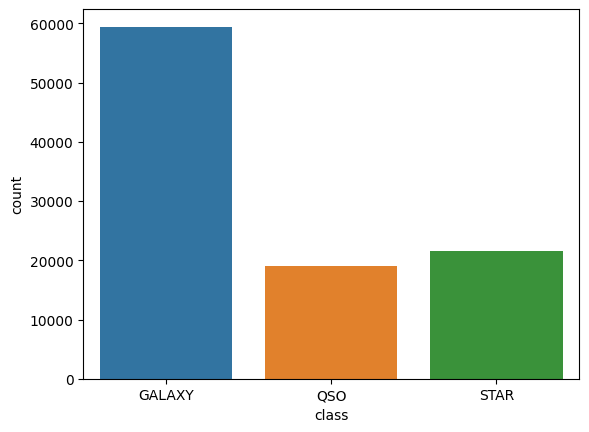

In [9]:
sb.countplot(data = astronomy_data, x = "class", hue = "class")

Wow! That is really unbalanced. Lets remove about half of the galaxies from the dataframe.

In [10]:
galaxy_indices = astronomy_data[astronomy_data['class'] == 'GALAXY'].index
rows_to_drop = np.random.choice(a = galaxy_indices, size = 50000)
astronomy_data = astronomy_data.drop(rows_to_drop)
astronomy_data

,alpha,delta,u,g,r,i,z,field_ID,spec_obj_ID,class,redshift,MJD
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,1.176014e+19,GALAXY,0.779136,58158
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,110,5.658977e+18,QSO,1.424659,55855
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,462,1.246262e+19,QSO,0.586455,58456
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,346,6.961443e+18,GALAXY,0.477009,56210
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,122,2.751763e+18,STAR,-0.000008,54082
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0.740551,-9.184243,23.13172,23.18506,21.52854,20.26975,20.11383,27,8.069569e+18,GALAXY,0.617036,56604
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,581,1.055431e+19,GALAXY,0.000000,57749
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,289,8.586351e+18,GALAXY,0.404895,56934
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,131,7.601080e+18,GALAXY,0.455040,56368


In [11]:
astronomy_data['class'].value_counts()

class
GALAXY    25579
STAR      21594
QSO       18961
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

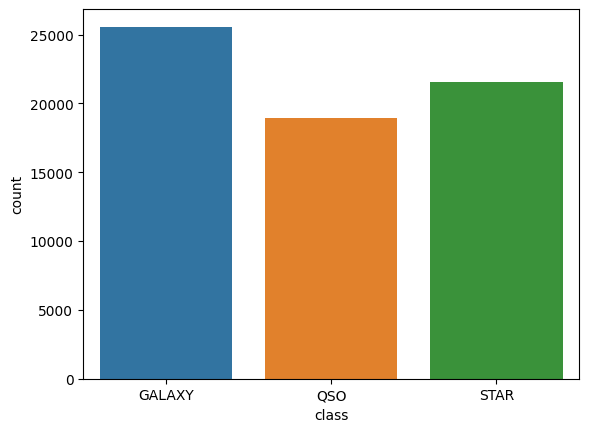

In [12]:
sb.countplot(data = astronomy_data, x = "class", hue = "class")

Much better! Now that our data is ready, let's move on to visualizations

<h2> Visualizations </h2>

<Axes: xlabel='r', ylabel='alpha'>

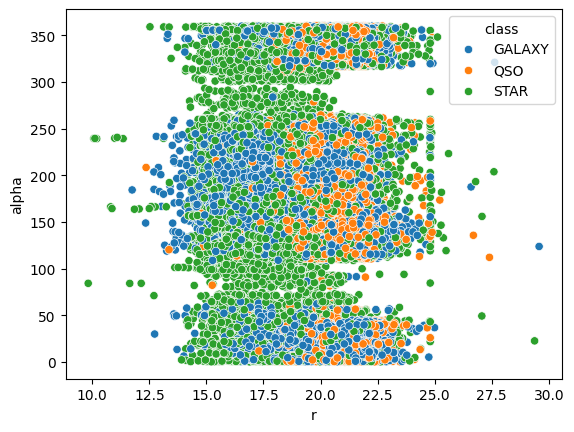

In [13]:
sb.scatterplot(data = astronomy_data, x = 'r', y = "alpha", hue = "class")

<Axes: xlabel='class', ylabel='r'>

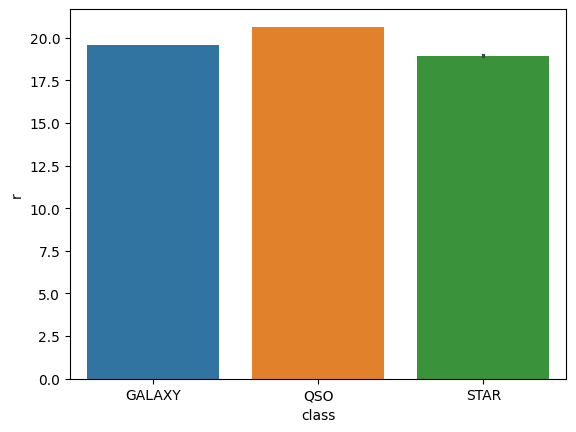

In [14]:
sb.barplot(data = astronomy_data, x = "class", y = "r", hue = "class")

<Axes: xlabel='alpha', ylabel='Count'>

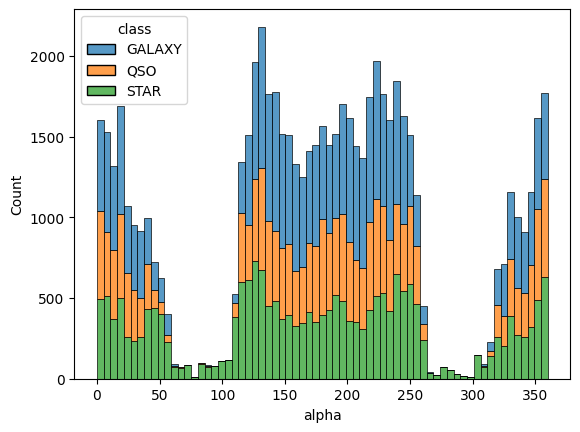

In [15]:
sb.histplot(data = astronomy_data, x = "alpha", hue = "class", multiple = "stack")

<Axes: xlabel='delta', ylabel='alpha'>

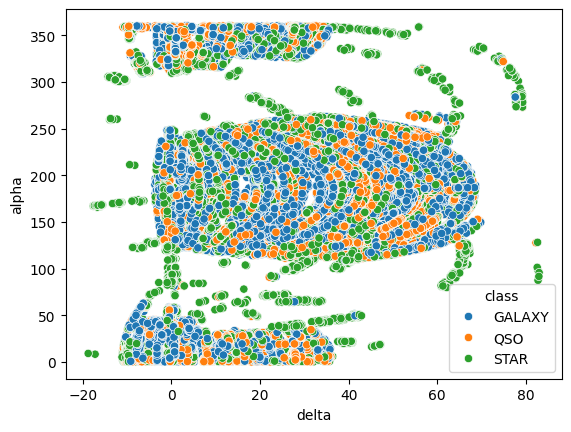

In [16]:
sb.scatterplot(data = astronomy_data, x = "delta", y = "alpha", hue = "class")

<Axes: xlabel='delta', ylabel='Density'>

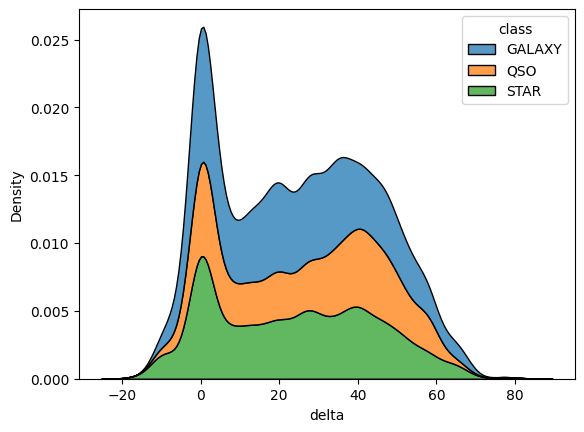

In [17]:
sb.kdeplot(data = astronomy_data, x = "delta", hue = "class", multiple = "stack")

<h2>Modeling and Metrics</h2>

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [19]:
X = astronomy_data.drop(columns = ['class'])
y = astronomy_data['class']

In [20]:
X

,alpha,delta,u,g,r,i,z,field_ID,spec_obj_ID,redshift,MJD
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,1.176014e+19,0.779136,58158
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,110,5.658977e+18,1.424659,55855
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,462,1.246262e+19,0.586455,58456
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,346,6.961443e+18,0.477009,56210
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,122,2.751763e+18,-0.000008,54082
...,...,...,...,...,...,...,...,...,...,...,...
99993,0.740551,-9.184243,23.13172,23.18506,21.52854,20.26975,20.11383,27,8.069569e+18,0.617036,56604
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,581,1.055431e+19,0.000000,57749
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,289,8.586351e+18,0.404895,56934
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,131,7.601080e+18,0.455040,56368


In [21]:
y

1        GALAXY
5           QSO
6           QSO
7        GALAXY
9          STAR
          ...  
99993    GALAXY
99995    GALAXY
99996    GALAXY
99998    GALAXY
99999    GALAXY
Name: class, Length: 66134, dtype: object

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

<h4> Decision Tree Model</h4>

In [23]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

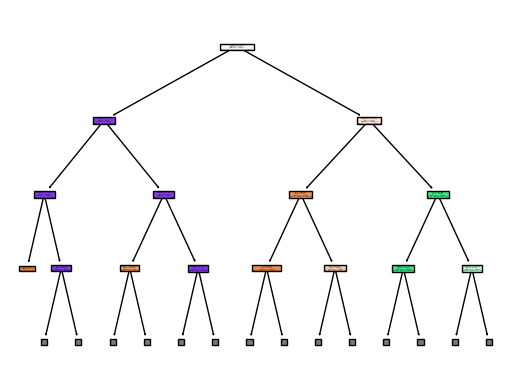

In [24]:
plot_tree(decision_tree = dtc, max_depth = 3, feature_names = X.columns, filled = True)
plt.show()

In [25]:
dtc_predictions = dtc.predict(X_test)
dtc_predictions

array(['QSO', 'QSO', 'STAR', ..., 'GALAXY', 'STAR', 'STAR'], dtype=object)

In [26]:
dtc.score(X_test, y_test)

0.9609888863687911

In [27]:
cross_val_score(estimator = dtc, X = X, y = y)

array([0.96174492, 0.96114009, 0.95962803, 0.9613669 , 0.95833963])

In [28]:
dtc.feature_importances_

array([0.00516934, 0.00591817, 0.01946161, 0.03319781, 0.00499409,
       0.00863718, 0.02047038, 0.00446867, 0.00742703, 0.88569318,
       0.00456253])

<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Feature'>

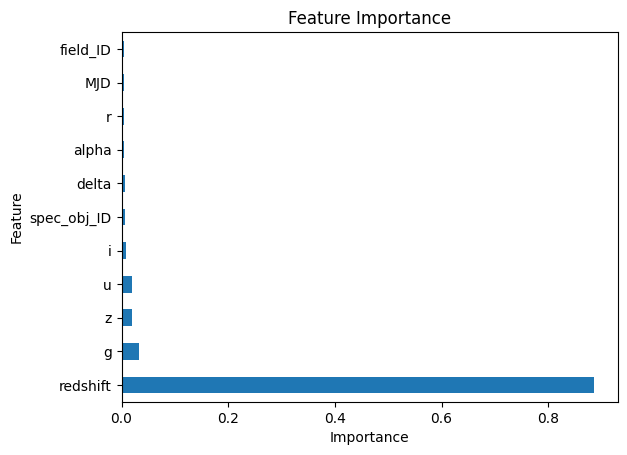

In [29]:
dt_feature_importance = pd.Series(dtc.feature_importances_, index = X.columns)
dt_feature_importance.nlargest(17).plot(kind = 'barh', xlabel = "Importance", ylabel = "Feature", title = "Feature Importance")

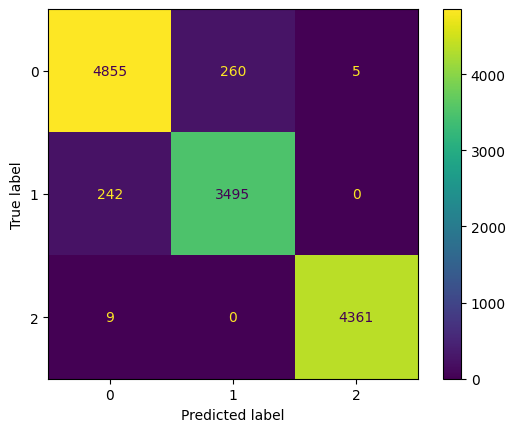

In [30]:
dtc_cf = confusion_matrix(y_test, dtc_predictions)
dtc_cf = ConfusionMatrixDisplay(confusion_matrix = dtc_cf)
dtc_cf.plot()
plt.show()

In [31]:
print(classification_report(y_test, dtc_predictions, target_names = y.unique()))

              precision    recall  f1-score   support

      GALAXY       0.95      0.95      0.95      5120
         QSO       0.93      0.94      0.93      3737
        STAR       1.00      1.00      1.00      4370

    accuracy                           0.96     13227
   macro avg       0.96      0.96      0.96     13227
weighted avg       0.96      0.96      0.96     13227



<h4> Random Forest Model</h4>

In [32]:
rf = RandomForestClassifier(n_estimators = 5)
rf = rf.fit(X_train, y_train)

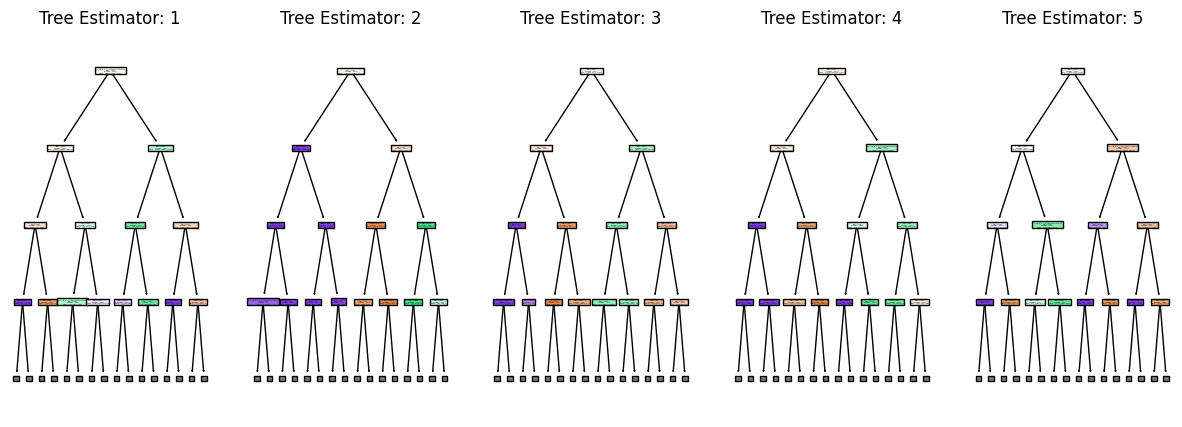

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 5))
for i in range(len(rf.estimators_)):
    plot_tree(rf.estimators_[i], max_depth = 3, feature_names = X.columns, filled = True, ax = ax[i])
    ax[i].set_title(f"Tree Estimator: {i + 1}")
plt.show()

In [34]:
rf_predictions = rf.predict(X_test)
rf_predictions

array(['QSO', 'QSO', 'STAR', ..., 'GALAXY', 'STAR', 'STAR'], dtype=object)

In [35]:
rf.score(X_test, y_test)

0.9718757087775005

In [36]:
cross_val_score(rf, X, y)

array([0.97096847, 0.97149769, 0.97127089, 0.97278294, 0.96952971])

In [37]:
rf.feature_importances_

array([0.00645563, 0.00763385, 0.07223047, 0.05021337, 0.02337463,
       0.05527111, 0.08047394, 0.00534382, 0.03405858, 0.65717049,
       0.00777411])

<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Feature'>

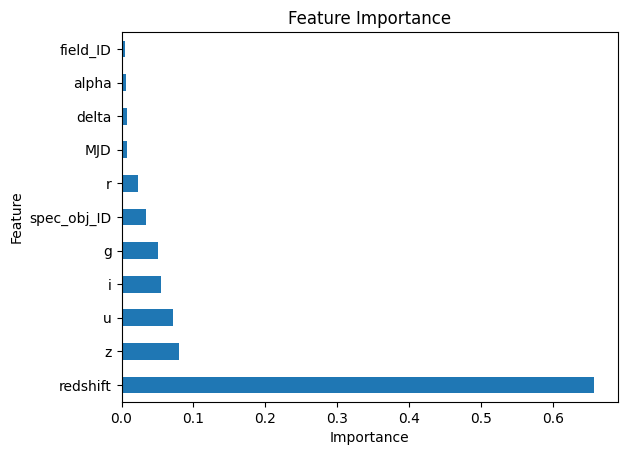

In [38]:
rf_feature_importance = pd.Series(rf.feature_importances_, index = X.columns)
rf_feature_importance.nlargest(17).plot(kind = 'barh', xlabel = "Importance", ylabel = "Feature", title = "Feature Importance")

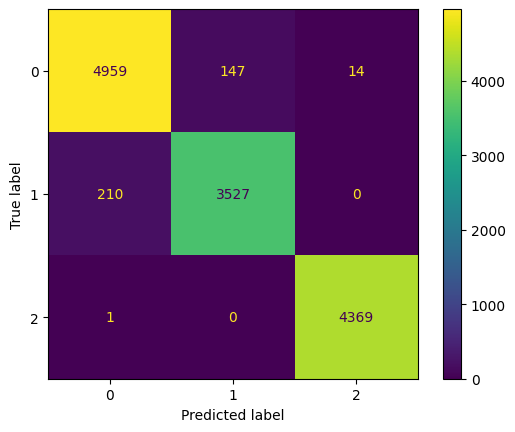

In [39]:
rf_cf = confusion_matrix(y_test, rf_predictions)
rf_cf = ConfusionMatrixDisplay(confusion_matrix = rf_cf)
rf_cf.plot()
plt.show()

In [40]:
print(classification_report(y_test, rf_predictions, target_names = y.unique()))

              precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.96      5120
         QSO       0.96      0.94      0.95      3737
        STAR       1.00      1.00      1.00      4370

    accuracy                           0.97     13227
   macro avg       0.97      0.97      0.97     13227
weighted avg       0.97      0.97      0.97     13227



<h4>K-Nearest Neighbors Classifier</h4>

In [41]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

In [42]:
knn_predictions = knn.predict(X_test)
knn_predictions

array(['GALAXY', 'GALAXY', 'STAR', ..., 'QSO', 'GALAXY', 'GALAXY'],
      dtype=object)

In [43]:
knn.score(X_test, y_test)

0.6196416420957133

In [44]:
cross_val_score(knn, X, y)

array([0.5490285 , 0.57798443, 0.58955167, 0.56021774, 0.56850144])

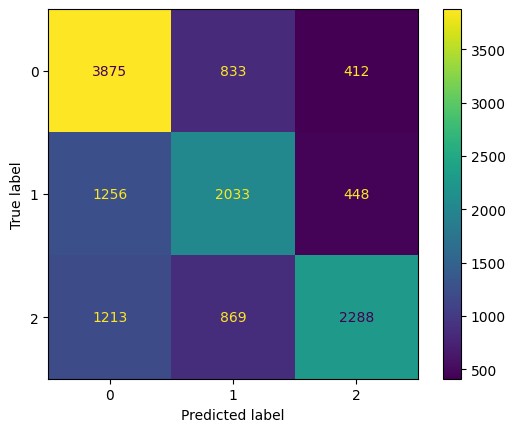

In [45]:
knn_cf = confusion_matrix(y_test, knn_predictions)
knn_cf = ConfusionMatrixDisplay(knn_cf)
knn_cf.plot()
plt.show()

In [46]:
print(classification_report(y_test, knn_predictions, target_names = y.unique()))

              precision    recall  f1-score   support

      GALAXY       0.61      0.76      0.68      5120
         QSO       0.54      0.54      0.54      3737
        STAR       0.73      0.52      0.61      4370

    accuracy                           0.62     13227
   macro avg       0.63      0.61      0.61     13227
weighted avg       0.63      0.62      0.62     13227



<h4> Naive Bayes</h4>

In [47]:
nb = GaussianNB()
nb = nb.fit(X_train, y_train)

In [48]:
nb_predictions = nb.predict(X_test)
nb_predictions

array(['QSO', 'GALAXY', 'GALAXY', ..., 'QSO', 'GALAXY', 'STAR'],
      dtype='<U6')

In [49]:
nb.score(X_test, y_test)

0.4614047025024571

In [50]:
cross_val_score(nb, X, y)

array([0.45187873, 0.44363801, 0.4793982 , 0.46011945, 0.44790564])

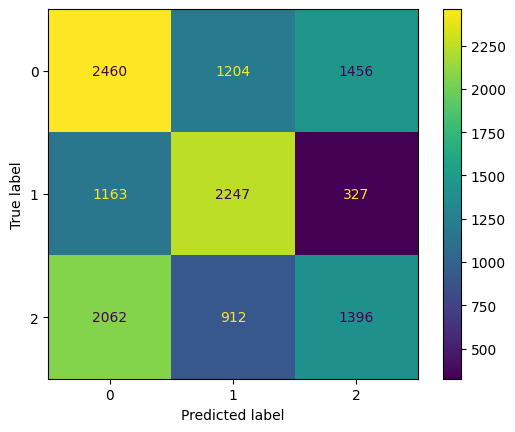

In [51]:
nb_cf = confusion_matrix(y_test, nb_predictions)
nb_cf = ConfusionMatrixDisplay(nb_cf)
nb_cf.plot()
plt.show()

In [52]:
print(classification_report(y_test, nb_predictions, target_names = y.unique()))

              precision    recall  f1-score   support

      GALAXY       0.43      0.48      0.46      5120
         QSO       0.52      0.60      0.55      3737
        STAR       0.44      0.32      0.37      4370

    accuracy                           0.46     13227
   macro avg       0.46      0.47      0.46     13227
weighted avg       0.46      0.46      0.46     13227

